Load data

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.fft import fft
from scipy.signal import butter, filtfilt 
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [26]:
# --- 2. Load Data ---
filepath = 'C:/Users/swa21001/Desktop/WyoFlex_Dataset/VOLTAGE_DATA/P1C1S1M1F1O1'
signal = np.genfromtxt(filepath, delimiter=',')  # One row of comma-separated floats

print("Loaded signal shape:", signal.shape)
print("First 10 values:", signal[:10])

Loaded signal shape: (13000,)
First 10 values: [1.28857143 1.34014652 1.35304029 1.39494505 1.44007326 1.44893773
 1.42959707 1.38527473 1.37076923 1.36271062]


In [28]:
from scipy.signal import butter, filtfilt 
# --- 3. Bandpass Filter ---
def bandpass_filter(data, lowcut=20, highcut=450, fs=1000, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

filtered_signal = bandpass_filter(signal)
print("Filtered signal shape:", filtered_signal.shape)

Filtered signal shape: (13000,)


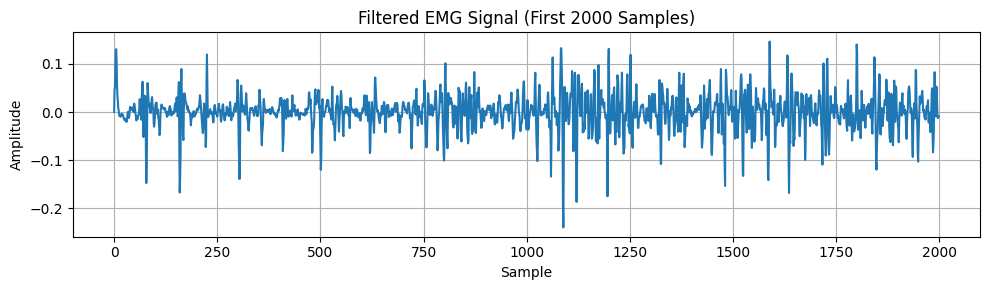

In [31]:
import matplotlib.pyplot as plt
# --- 4. Plot Filtered Signal ---
plt.figure(figsize=(10, 3))
plt.plot(filtered_signal[:2000])
plt.title("Filtered EMG Signal (First 2000 Samples)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# --- 5. Segment the Signal ---
window_size = 100
step = 50  # 50% overlap

X = []
for i in range(0, len(filtered_signal) - window_size, step):
    segment = filtered_signal[i:i+window_size]
    X.append(segment)

X = np.array(X)
X = X[..., np.newaxis]  # (samples, time_steps, features=1)
print("RNN input shape (X):", X.shape)


RNN input shape (X): (258, 100, 1)


In [35]:
from tensorflow.keras.utils import to_categorical
# --- 6. Generate Dummy Labels ---
num_classes = 3  # e.g. "grip", "rest", "release"
y = np.random.randint(0, num_classes, size=(X.shape[0],))
y_onehot = to_categorical(y, num_classes=num_classes)


In [38]:
# --- 7. Build and Train RNN ---
model = Sequential([
    Input(shape=(X.shape[1], 1)),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X, y_onehot, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,403 (25.01 KB)

 Trainable params: 6,403 (25.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3237 - loss: 1.1033 - val_accuracy: 0.3462 - val_loss: 1.0999
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2840 - loss: 1.1001 - val_accuracy: 0.4231 - val_loss: 1.0829
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3345 - loss: 1.0967 - val_accuracy: 0.2500 - val_loss: 1.1254
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3514 - loss: 1.0933 - val_accuracy: 0.3269 - val_loss: 1.0978
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4167 - loss: 1.0978 - val_accuracy: 0.2308 - val_loss: 1.1304
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3437 - loss: 1.1124 - val_accuracy: 0.2692 - val_loss: 1.1107
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3548 - loss: 1.0977 - val_accuracy: 0.3654 - val_loss: 1.1070
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4009 - loss: 1.0925 - val_accuracy: 0.2885 - val_loss: 1.1103


Signal loading ✅

Filtering ✅

Segmenting ✅

Feeding into RNN ✅

Training without errors ✅